<a href="https://colab.research.google.com/github/cristinaesuper/WIDS/blob/main/WIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

In [ ]:
import sys
import sklearn
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

WIDS_FILE_PATH = './input/train.csv'

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def load_WIDS_data(csv_path=WIDS_FILE_PATH):
    return pd.read_csv(csv_path)

data = load_WIDS_data()

# print(data.describe())

# **See histograms**

Saving figure attribute_histograms_plots


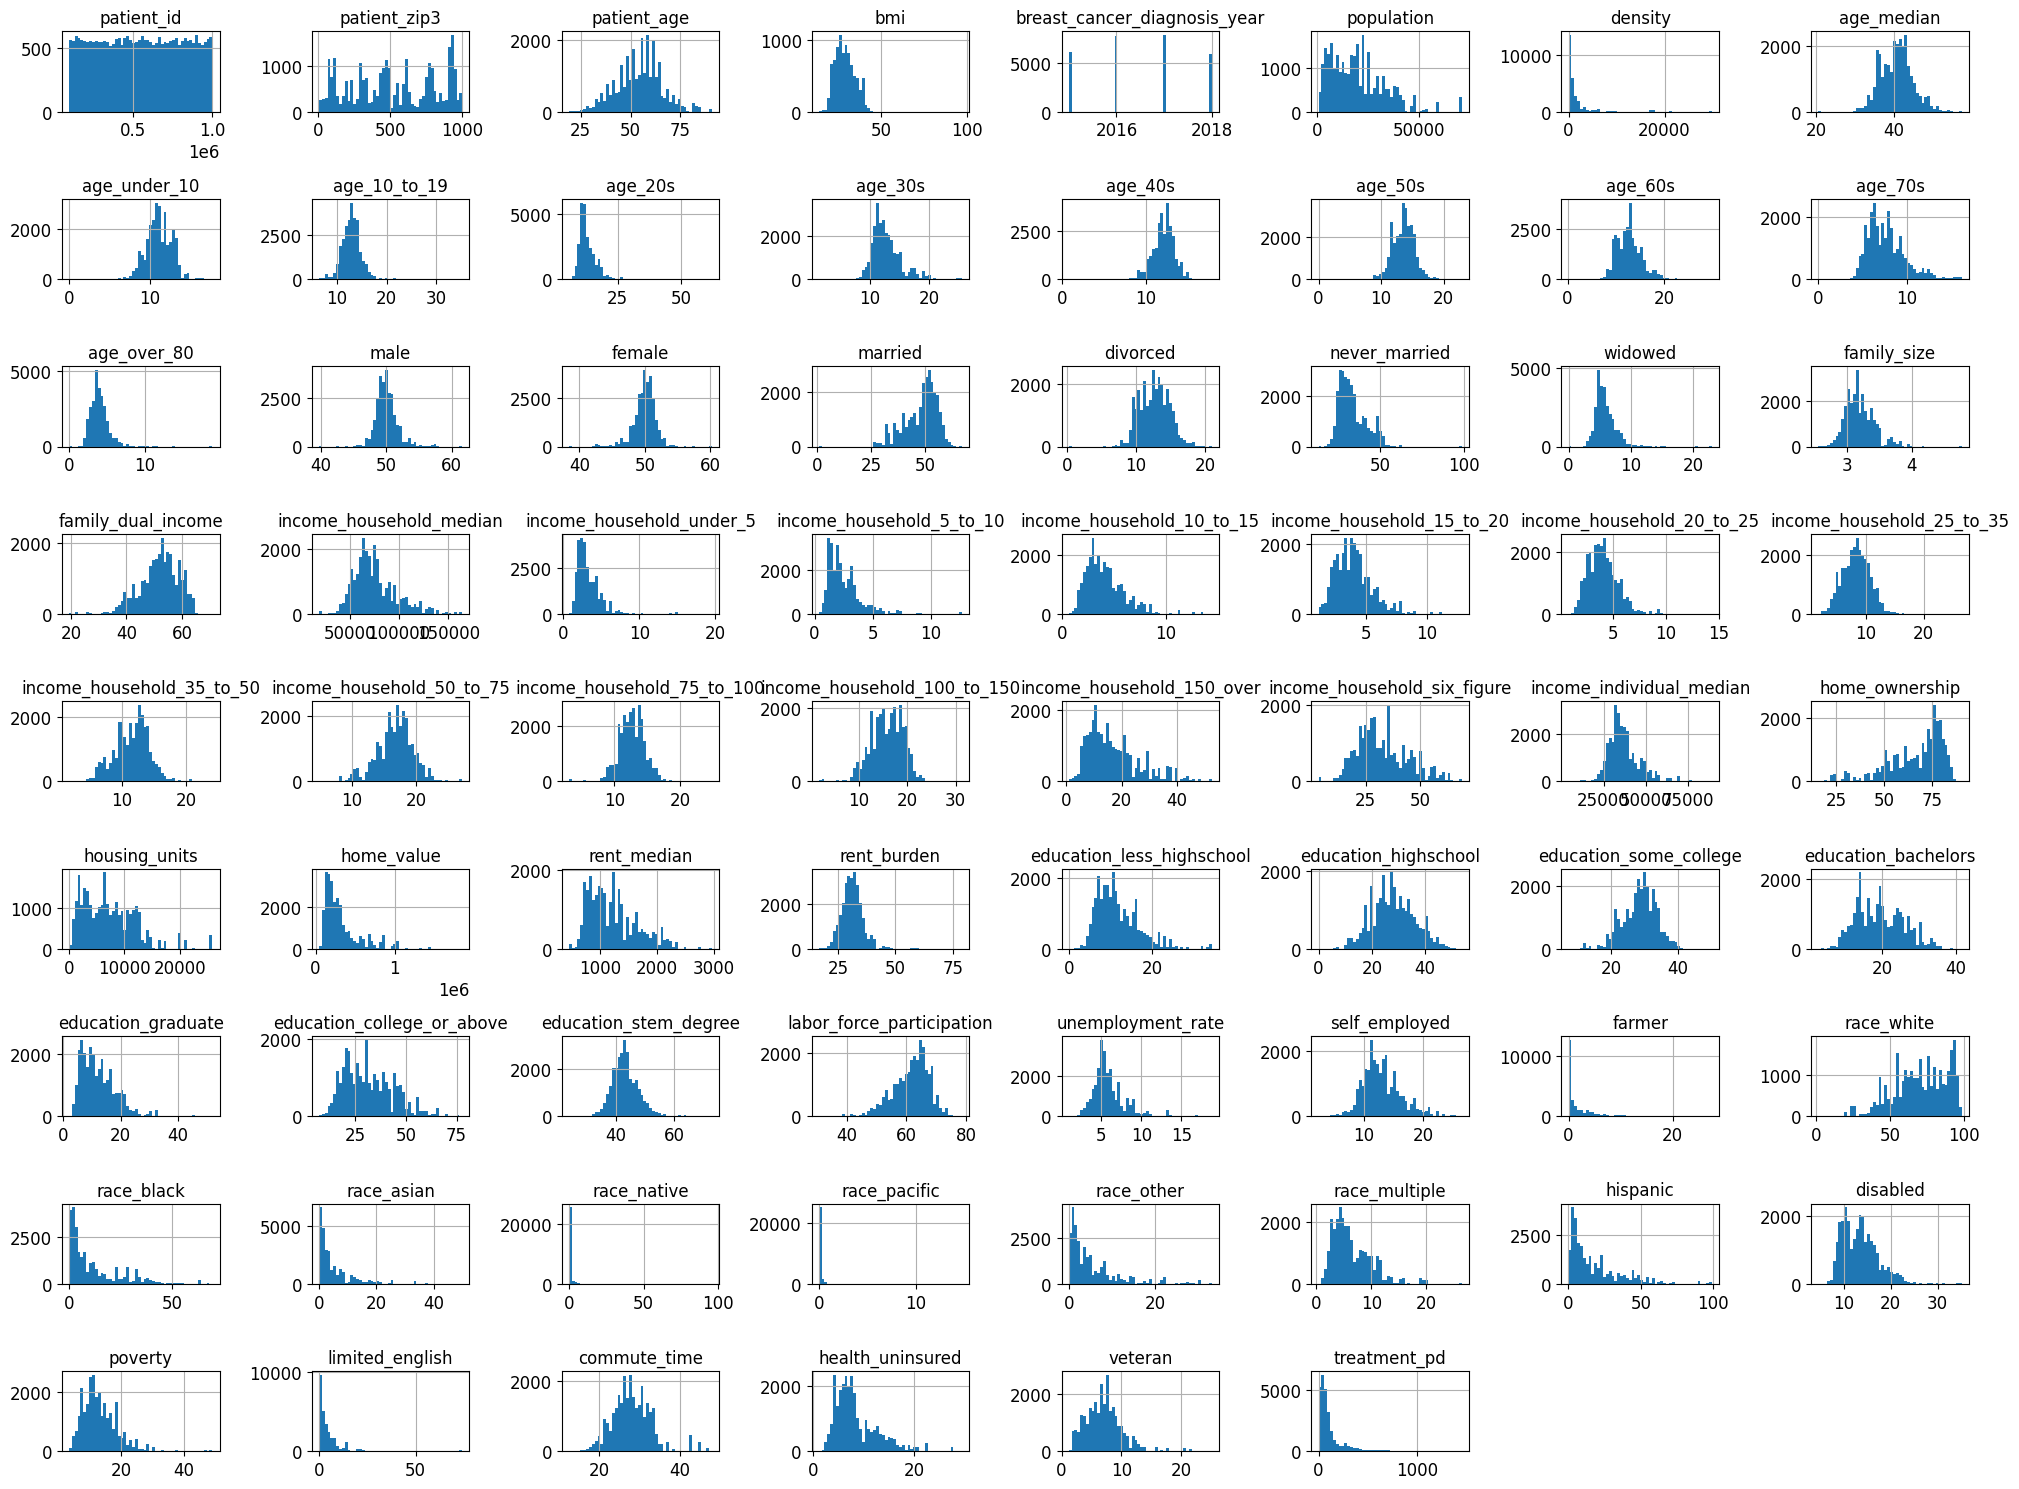

In [ ]:
### See histograms ###
data.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histograms_plots")
plt.show()

# **Create a Test Set**

We split the data into training and testing sets while preserving the class proportions present in the original data.

In [ ]:
print(data["patient_age"].unique())

[46 63 53 50 39 35 58 37 67 45 47 56 29 55 60 51 65 32 48 54 33 40 62 41
 78 59 71 52 76 69 64 61 66 38 57 25 34 36 44 43 49 73 28 27 70 72 90 68
 31 42 77 84 30 82 75 74 23 26 83 24 91 22 79 20 19 21]


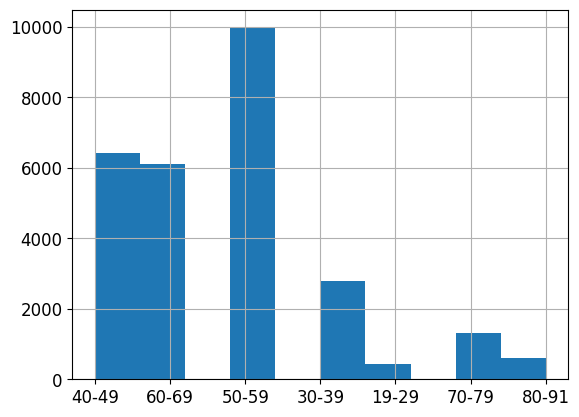

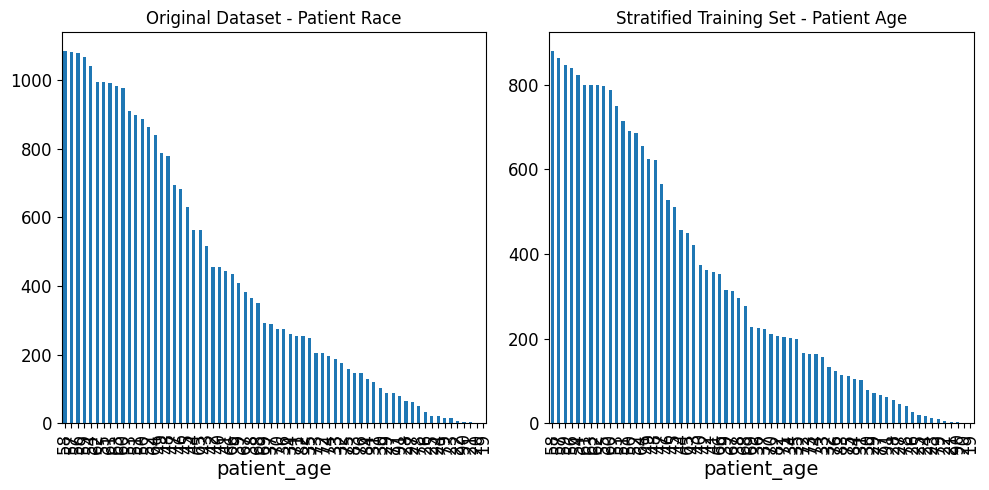

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# data["patient_race"] = data["patient_race"].fillna("Missing")

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(data, data["patient_race"]):
#     strat_train_set = data.iloc[train_index]
#     strat_test_set = data.iloc[test_index]

# Plot value counts of patient_race in the original dataset
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# data["patient_race"].value_counts().plot(kind="bar")
# plt.title("Original Dataset - Patient Race")

# Plot value counts of patient_race in the stratified training set
# plt.subplot(1, 2, 2)
# strat_train_set["patient_race"].value_counts().plot(kind="bar")
# plt.title("Stratified Training Set - Patient Race")

# plt.tight_layout()
# plt.show()

data["age_cat"] = pd.cut(data["patient_age"],
                         bins=[19, 30, 40, 50, 60, 70, 80, 92],
                         labels=["19-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-91"],
                         include_lowest=True)

data["age_cat"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["age_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# Plot value counts of patient_age in the original dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data["patient_age"].value_counts().plot(kind="bar")
plt.title("Original Dataset - Patient Race")

# Plot value counts of patient_age in the stratified training set
plt.subplot(1, 2, 2)
strat_train_set["patient_age"].value_counts().plot(kind="bar")
plt.title("Stratified Training Set - Patient Age")

plt.tight_layout()
plt.show()


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

# **Discover and visualize data to gain insights**

In [ ]:
data = strat_train_set.copy()

Saving figure data_scatterplot


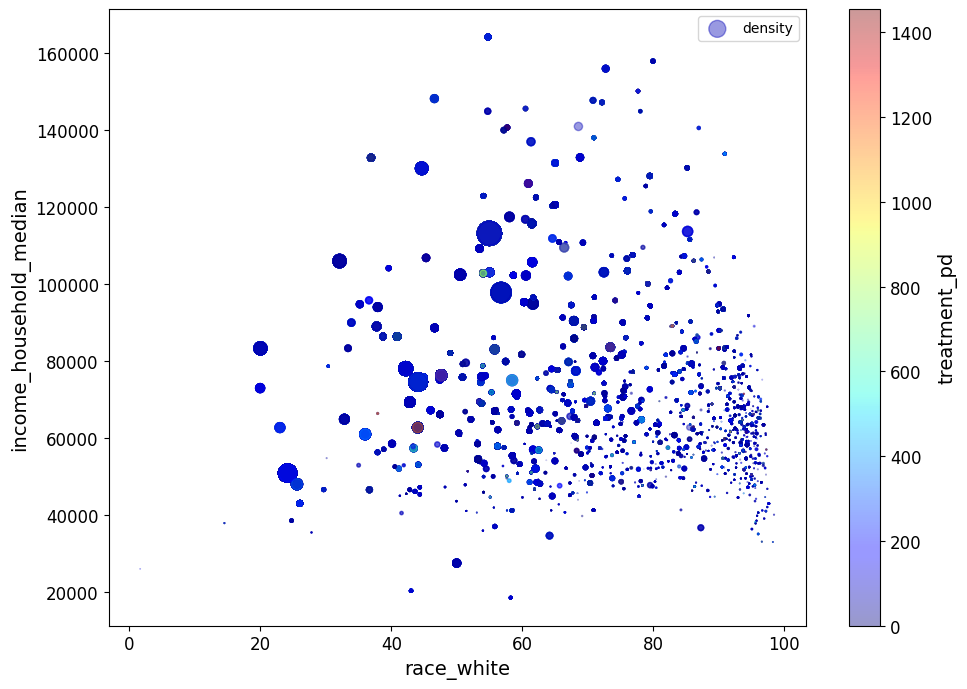

In [ ]:
### Discover and visualize data to gain insights ###
data.plot(kind="scatter", x="race_white", y="income_household_median", alpha=0.4,
          s=data["density"] / 100, label="density", figsize=(10, 7),
          c="treatment_pd", cmap=plt.get_cmap("jet"), colorbar=True,
          sharex=False)
plt.legend()
save_fig("data_scatterplot")

# **Looking for correlations**

treatment_pd                    1.000000
patient_age                     0.068519
rent_median                     0.043055
income_household_150_over       0.038034
home_value                      0.037441
                                  ...   
farmer                         -0.034867
income_household_50_to_75      -0.035176
income_household_25_to_35      -0.036286
income_household_35_to_50      -0.042603
breast_cancer_diagnosis_year   -0.392678
Name: treatment_pd, Length: 70, dtype: float64
Saving figure scatter_matrix_plot
Saving figure age_vs_treatment_pd_scatterplot
income_per_family    1.000000
farmer               0.621304
age_60s              0.568595
race_white           0.553228
age_median           0.532987
                       ...   
age_30s             -0.451654
age_20s             -0.475374
never_married       -0.509103
population          -0.633439
housing_units       -0.635903
Name: income_per_family, Length: 71, dtype: float64
Saving figure income_per_family_scatterp

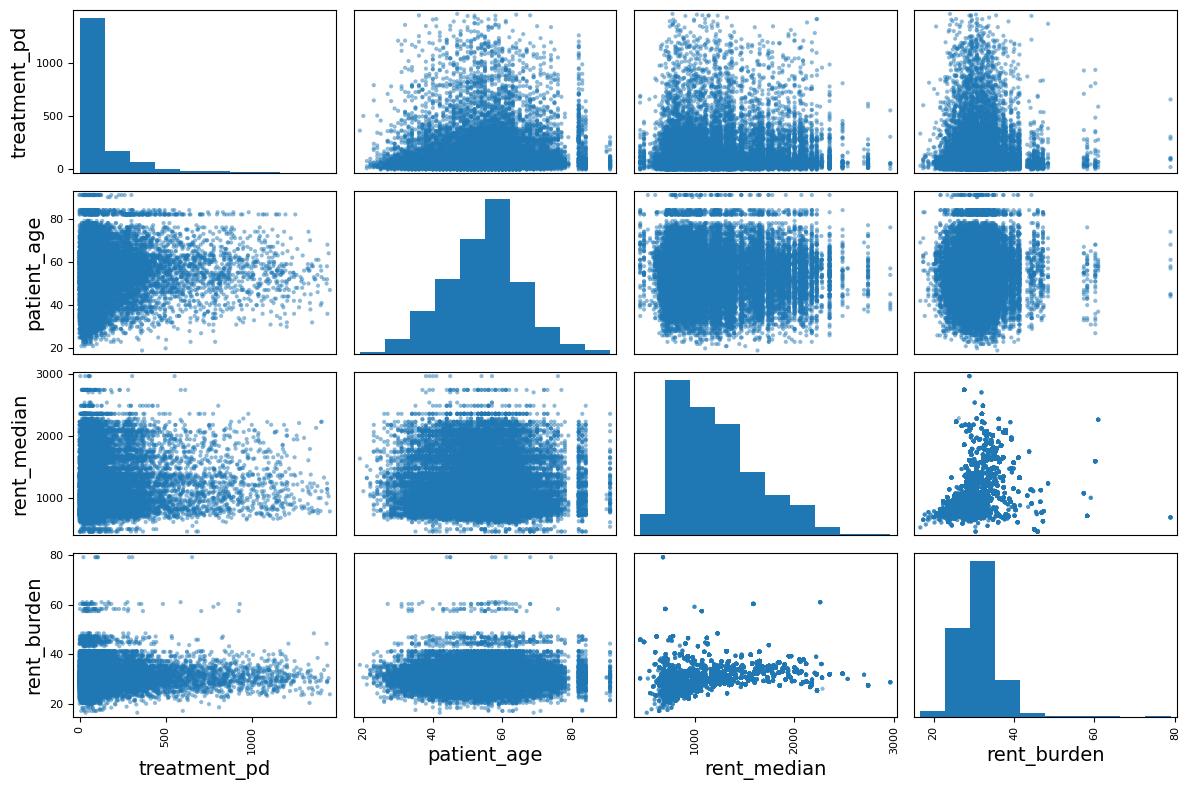

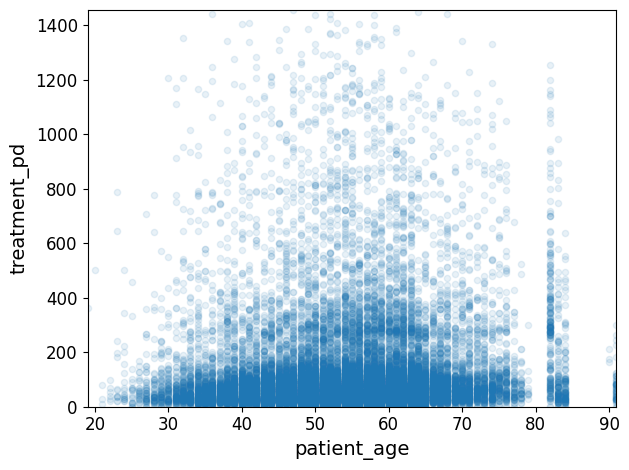

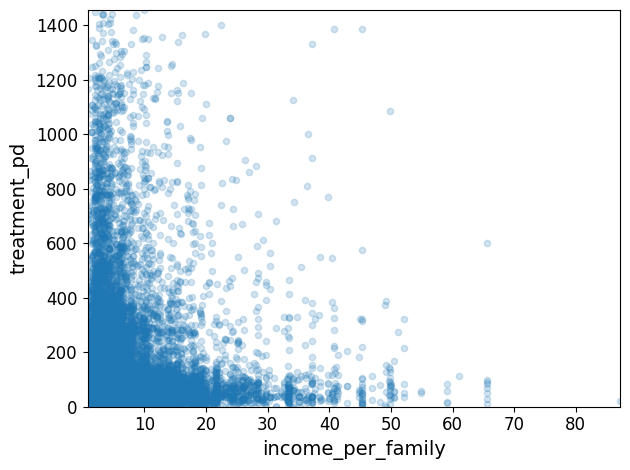

In [ ]:
### Looking for correlations ###
# Exclude non-numeric columns from sorting
numeric_cols = data.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()

print(corr_matrix["treatment_pd"].sort_values(ascending=False))

# Now we want to see the correlations on a graphic
attributes = ["treatment_pd", "patient_age", "rent_median", "rent_burden"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

min_age = data["patient_age"].min()
max_age = data["patient_age"].max()
min_treatment_pd = data["treatment_pd"].min()
max_treatment_pd = data["treatment_pd"].max()

data.plot(kind="scatter", x="patient_age", y="treatment_pd", alpha=0.1)
plt.axis((min_age, max_age, min_treatment_pd, max_treatment_pd))
save_fig("age_vs_treatment_pd_scatterplot")

# Experimenting with attribute combinations
data["income_per_family"] = data["income_household_median"] / data["population"]
numeric_cols = data.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

print(corr_matrix["income_per_family"].sort_values(ascending=False))

min_income = data["income_per_family"].min()
max_income = data["income_per_family"].max()
min_treatment_pd = data["treatment_pd"].min()
max_treatment_pd = data["treatment_pd"].max()

data.plot(kind="scatter", x="income_per_family", y="treatment_pd",
             alpha=0.2)
plt.axis((min_income, max_income, min_treatment_pd, max_treatment_pd))
save_fig("income_per_family_scatterplot")

# **Prepare the Data for Machine Learning Algorithms**

# **1. Data cleaning**

In [ ]:
pd.set_option('display.max_rows', 100)

# Get the total number of rows in the DataFrame
total_rows = len(data)

# Calculate the number of null values in each column
null_counts = data.isna().sum()

# Calculate the percentage of null values for each column
# Divide null counts by total rows and multiply by 100 for percentage
percent_null = (null_counts / total_rows) * 100

filtered_nulls = percent_null[percent_null > 0]

percent_null_sorted = filtered_nulls.sort_values(ascending=False)
print(percent_null_sorted)

pd.reset_option('display.max_rows')

metastatic_first_novel_treatment         99.158054
metastatic_first_novel_treatment_type    99.158054
bmi                                      68.385488
patient_race                             54.751753
metastatic_first_treatment_type          39.835224
payer_type                               10.247886
self_employed                             7.920792
farmer                                    7.920792
division                                  0.805811
region                                    0.805811
patient_state                             0.285467
poverty                                   0.010841
income_household_75_to_100                0.010841
rent_burden                               0.010841
rent_median                               0.010841
home_value                                0.010841
home_ownership                            0.010841
income_household_six_figure               0.010841
income_household_150_over                 0.010841
income_household_100_to_150    

We can see that *metastatic_first_novel_treatment* and *metastatic_first_novel_treatment_type* features have over 99% missing values, suggesting they might not be very informative in our analysis, so we can drop them.

In [ ]:
data = data.drop(columns=['metastatic_first_novel_treatment',
                          'metastatic_first_novel_treatment_type',
                          'bmi'])

For *patient_race* we create a new category ("Race Unknown"), because we don't want to assign races to individuals when they are unknown, since the percentage of the null cells is quite high.

In [ ]:
data['patient_race'] = data['patient_race'].fillna('Race Unknown')

For *metastatic_first_treatment_type*        we create a new category ("Unknown"), because we don't want to assign treatments to individuals when they are unknown, since the percentage of the null cells is quite high.

In [ ]:
data['metastatic_first_treatment_type'] = data['metastatic_first_treatment_type'].fillna('Unknown')

Now we want to check if the lower percentage features are left-skewed, right-skewed or normal to see what we have to do.

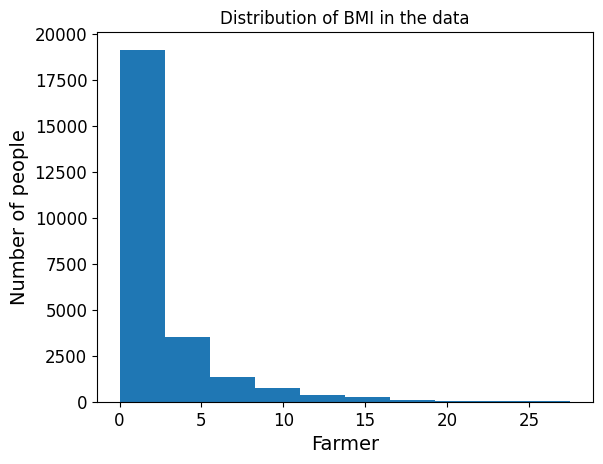

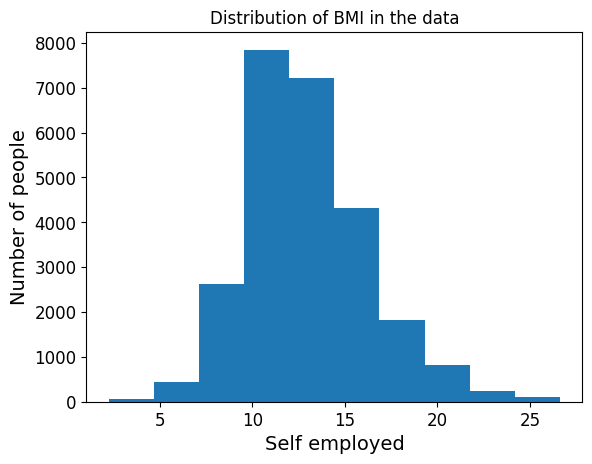

In [ ]:
plt.hist(data['farmer'])
plt.xlabel('Farmer')
plt.ylabel('Number of people')
plt.title('Distribution of BMI in the data')
plt.show()

plt.hist(data['self_employed'])
plt.xlabel('Self employed')
plt.ylabel('Number of people')
plt.title('Distribution of BMI in the data')
plt.show()

Since they are both right-skewed and percentages represent categorical values, we replace the null values with the mode.

In [ ]:
def compute_mode(data_series):
  # Count occurrences of each unique value
  value_counts = data_series.value_counts()

  # Get the mode(s) - values with the highest count
  mode_values = value_counts[value_counts == value_counts.max()]

  # Return the mode(s) as a list
  return mode_values.index.tolist()

self_employed_mode = compute_mode(data['self_employed'])
farmer_mode = compute_mode(data['farmer'])

data['self_employed'] = data['self_employed'].fillna(self_employed_mode[0])
data['farmer'] = data['farmer'].fillna(farmer_mode[0])

We compute the mode for *payer_type*

In [ ]:
payer_type_mode = compute_mode(data['payer_type'])

# Replace missing values with the mode (assuming single mode)
data['payer_type'] = data['payer_type'].fillna(payer_type_mode[0])

We will drop the rows containing missing values for features that have a missing percentage of less than 1.0.

In [ ]:
# Threshold for number of missing values percentage
threshold = 1.0

# Features to drop based on number of missing values
features_to_drop = filtered_nulls[filtered_nulls <= threshold].index.tolist()

# Drop rows with missing values in the specified features
data = data.dropna(subset=features_to_drop)

Delete the *patient_gender* column, because all the patients are female.

In [ ]:
data.drop("patient_gender", axis=1, inplace=True)

Delete *breast_cancer_diagnosis_desc*.

In [ ]:
data.drop("breast_cancer_diagnosis_desc", axis=1, inplace=True)

In [ ]:
data.drop("breast_cancer_diagnosis_code", axis=1, inplace=True)
data.drop("metastatic_cancer_diagnosis_code", axis=1, inplace=True)
data.drop("metastatic_first_treatment", axis=1, inplace=True)
data.drop("metastatic_first_treatment_type", axis=1, inplace=True)

# **2. Handling Text and Categorical Attributes**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Get data types of all features
data_types = data.dtypes

# Filter features that are not numeric (object usually represents strings/categorical data)
categorical_features = data_types[(data_types != 'int64') & (data_types != 'float64')].index.tolist()

# Create a ColumnTransformer object
transformer = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(sparse_output=False), categorical_features)  # One-hot encode categorical features
    ]
)

# Apply the transformer to your data
data_prepared = transformer.fit_transform(data)

# The encoded data will be a NumPy array with new features for each category
print(data_prepared)  # This will show the new shape of the data after encoding

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


# **Select and Train a Model**

In [ ]:
data_X = data.drop("treatment_pd", axis=1) # drop labels for training set
data_labels = data["treatment_pd"].copy()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = data_X.iloc[:10]
some_labels = data_labels.iloc[:10]
some_data_prepared = transformer.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [127.    163.625 127.875 142.375 142.625 109.375 131.625 122.875 114.125
 127.   ]


In [ ]:
print("Labels:", list(some_labels))

Labels: [35, 33, 24, 455, 162, 75, 393, 62, 43, 132]
